In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)


In [5]:
data.shape

(42000, 785)

In [6]:
m, n = data.shape

In [7]:
n

785

In [8]:
np.random.shuffle(data)

In [9]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

In [10]:
data_dev.shape

(785, 1000)

In [11]:
Y_dev.shape

(1000,)

In [12]:
X_dev.shape

(784, 1000)

In [13]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [14]:
X_train.shape

(784, 41000)

In [15]:
Y_train.shape

(41000,)

In [16]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    
    return W1,b1,W2,b2
    
    

In [17]:
def ReLU(Z):
    return np.maximum(Z,0)

In [18]:
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

In [19]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 =  W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2
    

In [20]:
def one_hot(Y):
    one_hot_Y = np.zeros((len(Y_train), int(Y.max())+1))
    one_hot_Y[np.arange(len(Y_train)) , Y] =1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [21]:
len(Y_train)

41000

In [22]:
Y_train.size

41000

In [23]:
Y_train.max()

9

In [24]:
def deriv_ReLU(Z):
    return Z > 0

In [25]:
def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 -one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2 , axis=1 , keepdims=True)
    dZ1 = W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1 , keepdims= True)
    return dW1,db1,dW2,db2
    

In [26]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [27]:
def get_predictions(A2):
    return np.argmax(A2,0)

In [28]:
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

In [29]:
def gradient_descent(X , Y , iterations , alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2  = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i%10 == 0:
            print('Iteration: ' , i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    
    return  W1,b1,W2,b2
        

In [30]:
W1,b1,W2,b2 = gradient_descent(X_train , Y_train , 500 , 0.1)

Iteration:  0
[5 4 5 ... 4 4 4] [1 0 8 ... 5 0 8]
Accuracy:  0.0638780487804878
Iteration:  10
[1 4 3 ... 0 4 0] [1 0 8 ... 5 0 8]
Accuracy:  0.15797560975609756
Iteration:  20
[1 0 3 ... 0 0 0] [1 0 8 ... 5 0 8]
Accuracy:  0.2223170731707317
Iteration:  30
[1 0 3 ... 0 0 0] [1 0 8 ... 5 0 8]
Accuracy:  0.27
Iteration:  40
[1 0 3 ... 0 0 0] [1 0 8 ... 5 0 8]
Accuracy:  0.31995121951219513
Iteration:  50
[1 0 3 ... 0 0 0] [1 0 8 ... 5 0 8]
Accuracy:  0.36821951219512195
Iteration:  60
[1 0 8 ... 0 0 0] [1 0 8 ... 5 0 8]
Accuracy:  0.41068292682926827
Iteration:  70
[1 0 8 ... 0 0 4] [1 0 8 ... 5 0 8]
Accuracy:  0.4444390243902439
Iteration:  80
[1 0 8 ... 0 0 4] [1 0 8 ... 5 0 8]
Accuracy:  0.48390243902439023
Iteration:  90
[1 0 8 ... 0 0 4] [1 0 8 ... 5 0 8]
Accuracy:  0.5272439024390244
Iteration:  100
[1 0 8 ... 0 0 4] [1 0 8 ... 5 0 8]
Accuracy:  0.5642439024390243
Iteration:  110
[1 0 8 ... 0 0 4] [1 0 8 ... 5 0 8]
Accuracy:  0.5949512195121951
Iteration:  120
[1 0 8 ... 0 0 4] [1

In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


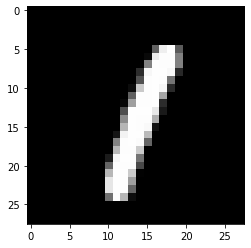

Prediction:  [0]
Label:  0


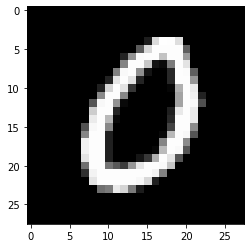

Prediction:  [8]
Label:  8


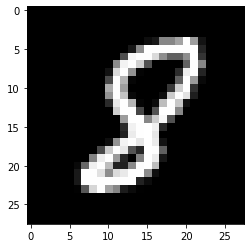

Prediction:  [1]
Label:  1


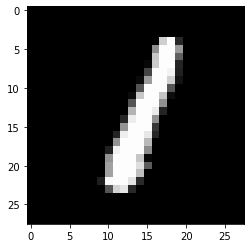

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 3 4 2 2 0 5 0 0 7 1 6 6 1 3 2 8 8 0 4 2 7 7 2 8 5 5 8 6 6 2 1 8 3 3 2 0
 9 2 7 6 7 6 5 7 5 2 1 1 2 7 3 7 7 4 6 6 7 0 7 2 2 1 7 0 0 7 4 1 9 3 0 2 3
 2 1 2 7 1 9 5 9 1 7 6 8 4 9 8 0 0 2 4 8 2 7 1 8 7 8 5 7 3 5 3 9 9 8 0 9 6
 5 9 2 4 7 9 1 5 2 1 8 2 8 8 7 3 1 1 4 4 9 1 6 0 2 7 3 1 4 1 2 6 8 7 6 5 2
 6 0 1 0 6 0 3 4 0 5 9 3 5 7 4 1 0 9 3 4 8 6 9 6 1 8 8 3 9 9 4 0 5 2 3 2 3
 2 5 4 6 9 2 9 3 5 7 6 1 9 5 3 2 4 0 2 8 3 0 2 5 8 2 8 7 8 4 6 7 8 6 9 2 9
 1 9 4 5 1 6 2 4 0 5 7 2 5 6 3 0 5 8 8 5 6 1 4 8 1 2 5 0 9 7 8 1 0 4 2 2 9
 4 5 8 9 8 5 2 7 1 6 0 9 8 6 2 1 3 5 6 1 9 6 2 5 9 9 7 1 1 6 0 1 5 1 2 7 8
 9 2 4 6 8 8 9 1 4 9 6 2 7 7 8 8 0 5 7 9 1 0 0 4 0 5 3 9 1 8 4 0 2 7 4 8 8
 3 6 4 0 1 4 1 1 1 9 5 2 4 9 7 0 9 8 6 3 5 8 2 2 4 6 8 7 8 3 2 7 6 0 2 2 6
 1 0 0 2 0 7 7 4 1 7 5 2 1 5 9 1 5 3 1 5 5 5 1 5 4 4 1 3 3 9 9 9 3 8 1 3 3
 9 4 6 9 9 1 6 4 2 2 0 3 6 0 1 4 2 9 1 7 5 6 5 7 0 6 8 6 6 5 5 6 0 3 7 6 1
 5 7 5 4 8 2 7 7 0 3 1 1 5 0 4 4 4 4 4 7 0 6 1 6 9 9 2 9 1 3 8 6 1 8 6 6 6
 5 3 0 7 8 0 4 9 7 9 2 1 

0.841